# Моделирование зависимостей

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Линейно зависимые случайные величины

$X$ - случайная величина с мат. ожиданием $E[X]$ и дисперсией $Var(X)$.

Пусть $Y = a \cdot X + N$, где $N$ - нормально распределённая случайная величина с мат. ожиданием 0 и дисперсией 1.

Тогда:

$$
cov(X, Y) = cov(X, aX+N) = E[X(aX+N)] - E[X]E[aX+N] = 
$$

$$
=
a \cdot E[X^2]+E[XN] - a \cdot E[X]E[X] - E[X]E[N] = 
a \cdot (E[X^2] - E[X]E[X]) + E[X]E[N] - E[X]E[N] = 
a \cdot Var(X)
$$

$$
r = corr(X, Y) = \frac{cov(X, Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}} = 
$$

$$
=
\frac{a \cdot Var(X)}{\sqrt{Var(X)}\sqrt{Var(aX+N)}} = 
\frac{a \cdot \sqrt{Var(X)}}{\sqrt{a^2 \cdot Var(X) + Var(N)}} = 
\frac{a \cdot \sqrt{Var(X)}}{\sqrt{a^2 \cdot Var(X) + 1}}
$$

$$
a = \frac{r}{\sqrt{var(X)(1-r^2)}}
$$

In [2]:
a = lambda corr, var_x: corr / np.sqrt(var_x*(1-corr**2))

In [3]:
n = 10000

E_X = 0
Var_X = 1

In [4]:
X = np.random.normal(E_X, Var_X, n)
N = np.random.normal(0, 1, n)

In [5]:
corrs = [-0.99, -0.7, -0.3, 0.0]

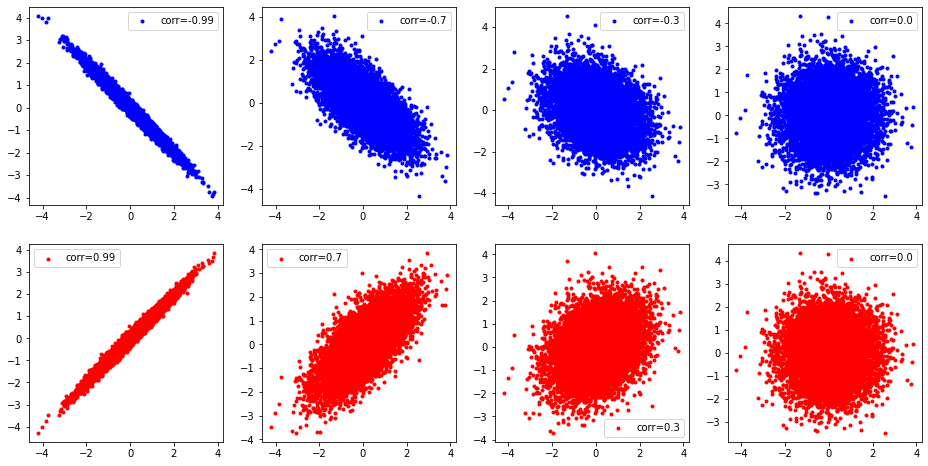

In [6]:
fig = plt.figure(figsize=(4 * len(corrs), 8))
gs = fig.add_gridspec(2, len(corrs))

for i, corr in enumerate(corrs):
    fig.add_subplot(gs[0, i])
    Y = a(corr, Var_X) * X + N
    Y = Y / np.std(Y)
    plt.scatter(X, Y, marker='.', color='blue', label=f'corr={corr}')
    plt.legend()
    
for i, corr in enumerate(np.abs(corrs)):
    fig.add_subplot(gs[1, i])
    Y = a(corr, Var_X) * X + N
    Y = Y / np.std(Y)
    plt.scatter(X, Y, marker='.', color='red', label=f'corr={corr}')
    plt.legend()

plt.show()

## 2. Нелинейно зависимые случайные величины

$X$ - случайная величина с мат. ожиданием $E[X]$ и дисперсией $Var(X)$.

Пусть $Y = \sin(X) + N$, где $N$ - нормально распределённая случайная величина с мат. ожиданием $0$ и дисперсией $D$.

Значение дисперсии будет определять степень зависимости $X$ и $Y$.

In [7]:
n = 5000

E_X = 0
Var_X = 1

In [8]:
X = np.random.normal(E_X, Var_X, n)

In [9]:
ds = [0, 0.1, 1, 10]

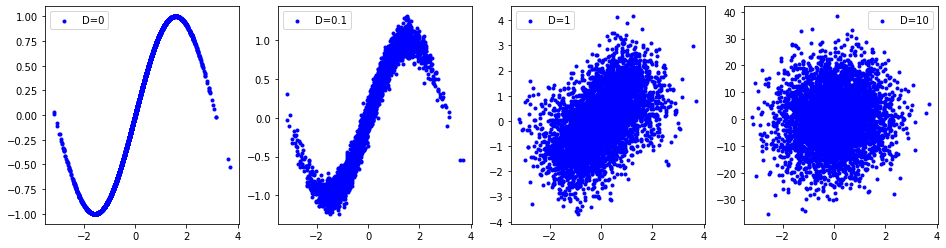

In [10]:
fig = plt.figure(figsize=(4 * len(ds), 4))
gs = fig.add_gridspec(1, len(ds))

for i, d in enumerate(ds):
    fig.add_subplot(gs[0, i])
    Y = np.sin(X) + np.random.normal(0, d, n)
    plt.scatter(X, Y, marker='.', color='blue', label=f'D={d}')
    plt.legend()
    
plt.show()